In [1]:
import jax
import jaxlib

print("jax version:", jax.__version__)
print("jaxlib version:", jaxlib.__version__)

import scvi
import h5py
import scanpy as sc
import anndata as ad
import pandas as pd
import scipy.sparse as sp
import numpy as np

jax version: 0.4.35
jaxlib version: 0.4.35


/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

In [2]:
combined_adata = ad.read_h5ad('/home/sv2785/research_folder/ann_data/TMS_BRAINONLY_Combined_GE_ATSE.h5ad')
reference_adata = sc.read("/home/sv2785/research_folder/ann_data/GE_Anndata_Object_BRAIN_only_20241105.h5ad")
print(reference_adata)
cell_id_to_cell_type = dict(zip(reference_adata.obs.index, reference_adata.obs["mouse.id"]))
combined_adata.obs["mouse.id"] = combined_adata.obs.index.map(cell_id_to_cell_type)
reference_adata = None
combined_adata.obs

AnnData object with n_obs × n_vars = 19942 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'cell_clean', 'cell_id', 'batch', 'old_cell_id_index', 'cell_id_index', 'subtissue_clean', 'cell_type_grouped', 'leiden'
    var: 'n_cells', 'mouse_gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


,batch_id,modality,mouse.id
cell_id_for_index,,,
A1_B000826,1,paired,3_39_F
A1_B001176,1,paired,3_56_F
A1_B003279,1,paired,3_38_F
A1_B003281,1,paired,3_39_F
A1_B003290,1,paired,3_38_F
...,...,...,...
P9_B003921,1,paired,24_59_M
P9_D045315,1,paired,18_45_M
P9_D045318,1,paired,18_45_M


In [3]:
combined_adata.obs
cell_id_to_cell_type = None

In [3]:
scvi.model.MULTIVISPLICE.setup_anndata(combined_adata, batch_key="mouse.id", atse_counts='cell_by_cluster_matrix', junc_counts='cell_by_junction_matrix')

In [5]:

model = scvi.model.MULTIVISPLICE(
    combined_adata,
    n_genes=(combined_adata.var["modality"] == "Gene_Expression").sum(),
    n_junctions=(combined_adata.var["modality"] == "Splicing").sum(),
)

model.view_anndata_setup()

/opt/conda/envs/scvi-env/lib/python3.12/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Anndata setup with scvi-tools version 1.2.0.

Setup via `MULTIVISPLICE.setup_anndata` with arguments:

{
│   'layer': None,
│   'atse_counts': 'cell_by_cluster_matrix',
│   'junc_counts': 'cell_by_junction_matrix',
│   'batch_key': 'mouse.id',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None,
│   'protein_expression_obsm_key': None,
│   'protein_names_uns_key': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│    n_atse_counts_key     │ 77042 │
│         n_batch          │  15   │
│         n_cells          │ 19942 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│    n_junc_counts_key     │ 77042 │
│         n_labels         │   1   │
│          n_vars          │ 77042 │
└──────────────────────────┴───────┘

                        Data Registry                        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  Registry Key   ┃           scvi-tools Location           ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        X        │                 adata.X                 │
│ atse_counts_key │ adata.layers['cell_by_cluster_matrix']  │
│      batch      │        adata.obs['_scvi_batch']         │
│      ind_x      │          adata.obs['_indices']          │
│ junc_counts_key │ adata.layers['cell_by_junction_matrix'] │
│     labels      │        adata.obs['_scvi_labels']        │
└─────────────────┴─────────────────────────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['mouse.id'] │  18_45_M   │          0          │
│                       │  18_46_F   │          1          │
│                       │  18_47_F   │          2          │
│                       │  18_53_M   │          3          │
│                       │  24_58_M   │          4          │
│                       │  24_59_M   │          5          │
│                       │  24_60_M   │          6          │
│                       │  24_61_M   │          7          │
│                       │   3_10_M   │          8          │
│                       │   3_11_M   │          9          │
│                       │   3_38_F   │         10          │
│                       │   3_39_F   │         11          │
│                       │   3_56_F   │         12          │
│                       │   3_8_M    │         13          │
│                       │   3_9_M    │         14          │
└───────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

                    batch State Registry                    
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃    Source Location    ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['mouse.id'] │  18_45_M   │          0          │
│                       │  18_46_F   │          1          │
│                       │  18_47_F   │          2          │
│                       │  18_53_M   │          3          │
│                       │  24_58_M   │          4          │
│                       │  24_59_M   │          5          │
│                       │  24_60_M   │          6          │
│                       │  24_61_M   │          7          │
│                       │   3_10_M   │          8          │
│                       │   3_11_M   │          9          │
│                       │   3_38_F   │         10          │
│                       │   3_39_F   │         11          │
│                       │   3_56_F   │         12          │
│                       │   3_8_M    │         13          │
│                       │   3_9_M    │         14          │
└───────────────────────┴────────────┴─────────────────────┘

In [6]:
model.train()

/var/tmp/ipykernel_7099/1676823408.py:1: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train()
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/conda/envs/scvi-env/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in 

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Monitored metric reconstruction_loss_validation did not improve in the last 50 records. Best score: 17342.846. Signaling Trainer to stop.


In [7]:
model.save("/home/sv2785/research_folder/ann_data/", overwrite=True)

In [4]:
model = scvi.model.MULTIVISPLICE.load("/home/sv2785/research_folder/ann_data/", adata=combined_adata)

INFO     File /home/sv2785/research_folder/ann_data/model.pt already downloaded                                    


/home/sv2785/research_folder/scvi-tools-splicing/src/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_locat

In [5]:
imputed_expression_z_mean = model.get_splicing_estimates()
imputed_expression_z_mean.to_csv('/home/sv2785/research_folder/ann_data/splicing_estimates.csv')

,0,1,2,3,4,5,6,7,8,9,...,54066,54067,54068,54069,54070,54071,54072,54073,54074,54075
cell_id_for_index,,,,,,,,,,,,,,,,,,,,,
A1_B000826,0.5,0.722544,0.500000,0.500000,0.760712,0.500000,0.5,0.5,0.762649,0.5,...,0.536882,0.719523,0.50000,0.830624,0.500000,0.823315,0.5,0.500000,0.518114,0.554398
A1_B001176,0.5,0.501539,0.500000,0.500000,0.747961,0.500000,0.5,0.5,0.894204,0.5,...,0.522380,0.881665,0.50000,0.920073,0.500000,0.730072,0.5,0.500000,0.525766,0.500000
A1_B003279,0.5,0.647028,0.500000,0.500000,0.857525,0.500000,0.5,0.5,0.914090,0.5,...,0.544817,0.640081,0.50000,0.892737,0.500000,0.793888,0.5,0.517278,0.579243,0.517654
A1_B003281,0.5,0.709940,0.500000,0.500000,0.739297,0.500000,0.5,0.5,0.739412,0.5,...,0.500000,0.695232,0.50000,0.856509,0.500000,0.816493,0.5,0.500000,0.524952,0.544250
A1_B003290,0.5,0.584208,0.531557,0.500000,0.707523,0.500000,0.5,0.5,0.933435,0.5,...,0.502315,0.500000,0.50000,0.500000,0.520409,0.893392,0.5,0.500000,0.606742,0.673008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9_B003921,0.5,0.847892,0.526712,0.587625,0.651583,0.500899,0.5,0.5,0.829681,0.5,...,0.500000,0.752422,0.54353,0.500000,0.562065,0.502353,0.5,0.500000,0.500000,0.531543
P9_D045315,0.5,0.645976,0.500000,0.500000,0.737857,0.500000,0.5,0.5,0.958270,0.5,...,0.500000,0.586780,0.50000,0.926206,0.500000,0.689369,0.5,0.500000,0.541584,0.505050
P9_D045318,0.5,0.592639,0.500000,0.500000,0.649552,0.500000,0.5,0.5,0.943180,0.5,...,0.500000,0.607350,0.50000,0.911115,0.500000,0.675458,0.5,0.500000,0.541271,0.500000


In [9]:
import scanpy as sc
MULTIVI_LATENT_KEY = "X_multivi"

combined_adata.obsm[MULTIVI_LATENT_KEY] = model.get_latent_representation()

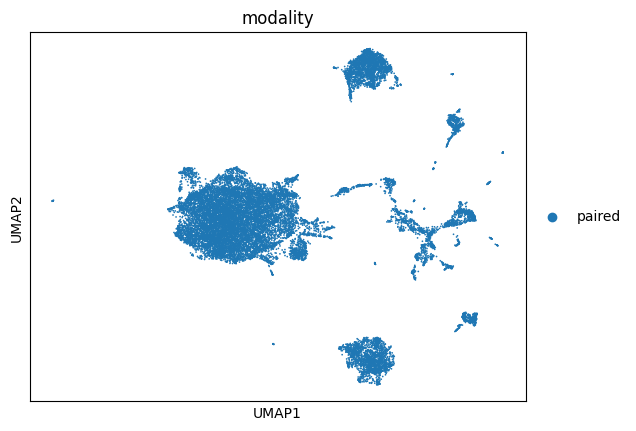

In [10]:
sc.pp.neighbors(combined_adata, use_rep=MULTIVI_LATENT_KEY)
sc.tl.umap(combined_adata, min_dist=0.2)
sc.pl.umap(combined_adata, color="modality")

AnnData object with n_obs × n_vars = 19942 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'cell_clean', 'cell_id', 'batch', 'old_cell_id_index', 'cell_id_index', 'subtissue_clean', 'cell_type_grouped', 'leiden'
    var: 'n_cells', 'mouse_gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


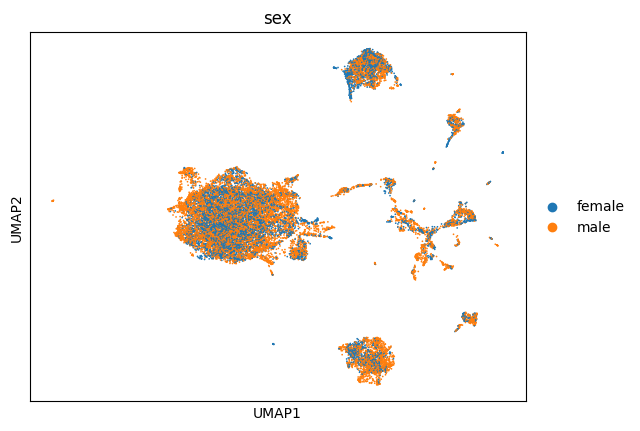

In [20]:
reference_adata = sc.read("/home/sv2785/research_folder/ann_data/GE_Anndata_Object_BRAIN_only_20241105.h5ad")
print(reference_adata)
group = "sex"
cell_id_to_cell_type = dict(zip(reference_adata.obs.index, reference_adata.obs[group]))
combined_adata.obs[group] = combined_adata.obs.index.map(cell_id_to_cell_type)
sc.pl.umap(combined_adata, color=group)

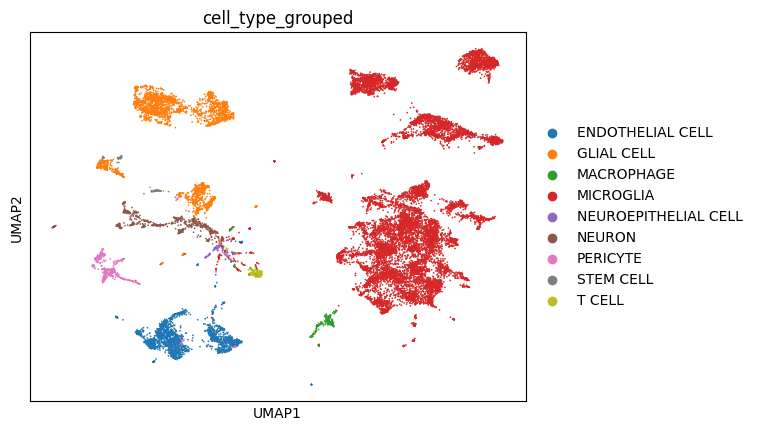

In [16]:
sc.pl.umap(combined_adata, color="cell_type_grouped")

In [15]:
obsm = reference_adata.obsm
umaps = obsm['X_umap']
reference_adata.obs

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,...,n_genes,n_counts,cell_clean,cell_id,batch,old_cell_id_index,cell_id_index,subtissue_clean,cell_type_grouped,leiden
cell_id_for_index,,,,,,,,,,,,,,,,,,,,,
A1_B000826,nan,3m,A1.B000826.3_39_F.1.1,microglial cell,CL:0000129,nan,facs,3_39_F,female,Cortex,...,1887,680300.0,A1_B000826,A1-B000826-3_39_F-1-1,1,6,6,Cortex,MICROGLIA,4
A1_B001176,nan,3m,A1.B001176.3_56_F.1.1,microglial cell,CL:0000129,nan,facs,3_56_F,female,Striatum,...,2257,989907.0,A1_B001176,A1-B001176-3_56_F-1-1,1,9,9,Striatum,MICROGLIA,4
A1_B003279,nan,3m,A1.B003279.3_38_F.1.1,microglial cell,CL:0000129,nan,facs,3_38_F,female,Cerebellum,...,1091,670229.0,A1_B003279,A1-B003279-3_38_F-1-1,1,22,22,Cerebellum,MICROGLIA,4
A1_B003281,nan,3m,A1.B003281.3_39_F.1.1,microglial cell,CL:0000129,nan,facs,3_39_F,female,Hippocampus,...,1930,719168.0,A1_B003281,A1-B003281-3_39_F-1-1,1,23,23,Hippocampus,MICROGLIA,4
A1_B003290,nan,3m,A1.B003290.3_38_F.1.1,ependymal cell,CL:0000127,Ependyma,facs,3_38_F,female,Striatum,...,3345,379820.0,A1_B003290,A1-B003290-3_38_F-1-1,1,25,25,Striatum,GLIAL CELL,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9_B003921,Microglia,24m,P9_B003921,microglial cell,nan,nan,facs,24_59_M,male,Cortex,...,1457,18500472.0,P9_B003921,P9_B003921_S369_L001,1,107554,106828,Cortex,MICROGLIA,4
P9_D045315,Microglia,18m,P9_D045315,microglial cell,nan,nan,facs,18_45_M,male,Hippocampus,...,1974,852807.0,P9_D045315,P9_D045315_B008285_S369,1,107559,106833,Hippocampus,MICROGLIA,4
P9_D045318,Microglia,18m,P9_D045318,microglial cell,nan,nan,facs,18_45_M,male,Striatum,...,2120,1214492.0,P9_D045318,P9_D045318_B008591_S369,1,107560,106834,Striatum,MICROGLIA,0


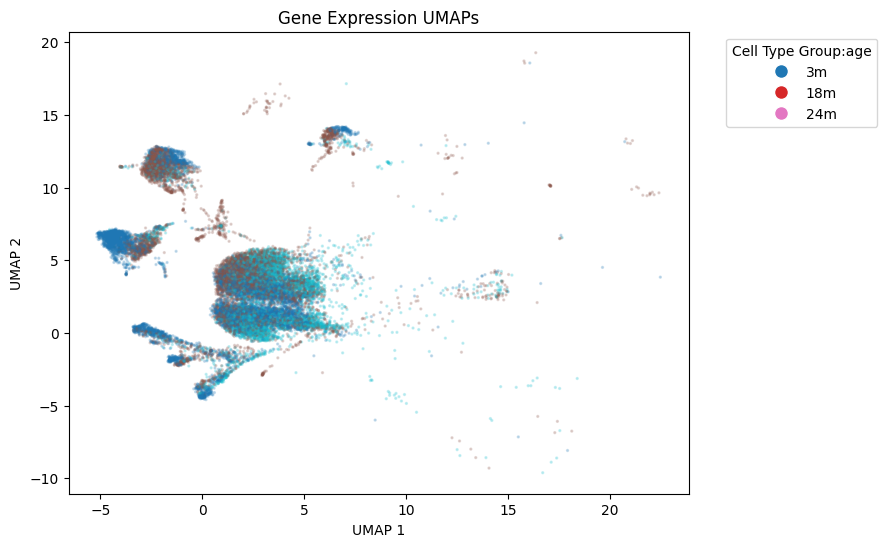

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
group = "sex"
cell_types = reference_adata.obs[group]

scatter = plt.scatter(umaps[:, 0], umaps[:, 1], 
                      c=cell_types.astype('category').cat.codes, 
                      cmap='tab10', alpha=0.2, s = 2)
legend_labels = cell_types.astype('category').cat.categories
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / len(legend_labels)), markersize=10) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, title=f"Cell Type Group:{group}", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Gene Expression UMAPs")
plt.show()

AnnData object with n_obs × n_vars = 19942 × 22966
    obs: 'FACS.selection', 'age', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'method', 'mouse.id', 'sex', 'subtissue', 'tissue', 'n_genes', 'n_counts', 'cell_clean', 'cell_id', 'batch', 'old_cell_id_index', 'cell_id_index', 'subtissue_clean', 'cell_type_grouped', 'leiden'
    var: 'n_cells', 'mouse_gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'


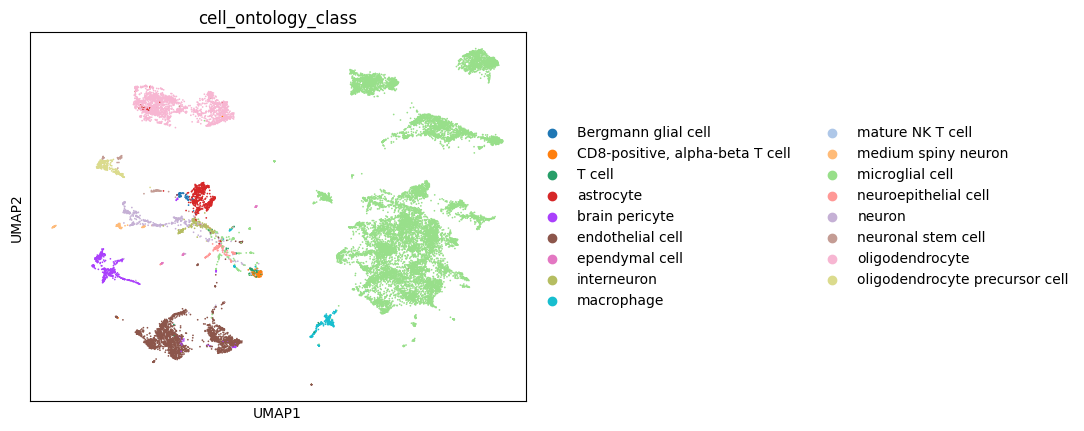

In [19]:
reference_adata = sc.read("/home/sv2785/research_folder/ann_data/GE_Anndata_Object_BRAIN_only_20241105.h5ad")
print(reference_adata)
cell_id_to_cell_type = dict(zip(reference_adata.obs.index, reference_adata.obs["sex"]))
combined_adata.obs["sex"] = combined_adata.obs.index.map(cell_id_to_cell_type)
sc.pl.umap(combined_adata, color="cell_ontology_class")

In [1]:
sc.pl.umap(combined_adata, color="age")
sc.pl.umap(combined_adata, color="sex")

NameError: name 'sc' is not defined